<a href="https://colab.research.google.com/github/ryandale7/ML-on-Graphs/blob/main/12_Unsupervised_and_Semi_Supervised_Learning_on_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Automated Download and Extraction

In this approach, we will:
- Mount Google Drive.
- Create or navigate to a "Data" subfolder under "Colab Notebooks".
- Use `curl` to download the compressed file (`as20000102.txt.gz`) from the repository.
- Extract (unzip) the `.gz` file using `gunzip`.
- Verify the extracted file.
- Load and inspect the dataset.


In [1]:
from google.colab import drive

drive.mount("/content/drive")

!mkdir -p "/content/drive/MyDrive/Colab Notebooks/Data"
%cd "/content/drive/MyDrive/Colab Notebooks/Data"

!curl -O https://snap.stanford.edu/data/as20000102.txt.gz
!gunzip as20000102.txt.gz
!ls -lh

# Load and verify the dataset by printing the first 10 lines
with open("as20000102.txt", "r") as file:
    for i in range(10):
        print(file.readline().strip())

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40325  100 40325    0     0  40374      0 --:--:-- --:--:-- --:--:-- 40365
total 224M
-rw------- 1 root root 113K Feb  7 12:50 as20000102.txt
-rw------- 1 root root 5.1M Feb  7 09:36 ca-AstroPh.txt
-rw------- 1 root root 6.4M Jan 10 19:22 cit-HepPh.txt
-rw------- 1 root root 5.4M Feb  7 09:02 cit-HepTh.txt
-rw------- 1 root root 1.1M Jan 16 12:52 CollegeMsg.txt
-rw------- 1 root root  13M Jan 10 18:46 com-amazon.ungraph.txt
-rw------- 1 root root 1.1M Jan 16 18:57 com-lj.top5000.cmty.txt
-rw------- 1 root root 7.5M Jan 10 19:22 com-orkut.top5000.cmty.txt
drwx------ 2 root root 4.0K Jan  6 14:56 congress_network
-rw------- 1 root root 190K Jan 16 10:36 congress_network.zip
drwx------ 2 root root 4.0K Jan 10 19:12 deezer_ego_nets
-rw------- 1 root root 189K Ja

## Manual Upload Instructions

If the automated method is not feasible or you prefer manual steps, follow these instructions:
- Download the file from [this link](https://snap.stanford.edu/data/as20000102.txt.gz) to your local machine.
- Extract the file locally (e.g., right-click and unzip, or use `gunzip` on macOS/Linux) to obtain `as20000102.txt`.
- In your Google Drive, create or navigate to the "Colab Notebooks/Data" folder.
- Upload the extracted file (`as20000102.txt`) into that Data subfolder.
- Open or create a Colab notebook.
- Mount your Google Drive and change the working directory to the Data folder using the code below.
- Load and verify the dataset by printing the first 10 lines.


In [ ]:
from google.colab import drive

drive.mount("/content/drive")

%cd "/content/drive/MyDrive/Colab Notebooks/Data"

# Load and verify the manually uploaded dataset by printing the first 10 lines
with open("as20000102.txt", "r") as file:
    for i in range(10):
        print(file.readline().strip())

## Running black Code


In [12]:
# Running black

from google.colab import drive

!pip install nbqa black

!nbqa black .

No notebooks found in given path(s)


## Section 1: Unsupervised Graph Representation Learning through Community Detection


### Objectives
- Understand unsupervised methods for graph representation learning.
- Learn how community detection can be used as a form of feature extraction in graphs.


### Introduction
Community detection algorithms identify densely connected subgraphs within a larger network, revealing the underlying modular structure. In this section, we use community detection to derive unsupervised features for nodes from the Autonomous Systems dataset. These community memberships can serve as valuable features for downstream graph learning tasks.


### Key Points
- Communities reveal groups of nodes that interact more frequently with each other than with the rest of the network.
- Extracting community membership is an effective unsupervised feature extraction method.
- Community detection methods are scalable and provide insights into the macro-level structure of the network.


### Code Examples
The following code demonstrates how to:
- Load the Autonomous Systems dataset (`as20000102.txt`).
- Compute basic graph statistics.
- Run a community detection algorithm (Louvain method) on the graph.
- Visualize the detected communities on a subgraph.


Graph Loaded: Nodes = 6474 Edges = 13895
Number of nodes: 6474
Number of edges: 13895
Average clustering coefficient: 0.25222243511614334
Approximate Diameter: 9
Number of communities detected in subgraph: 12


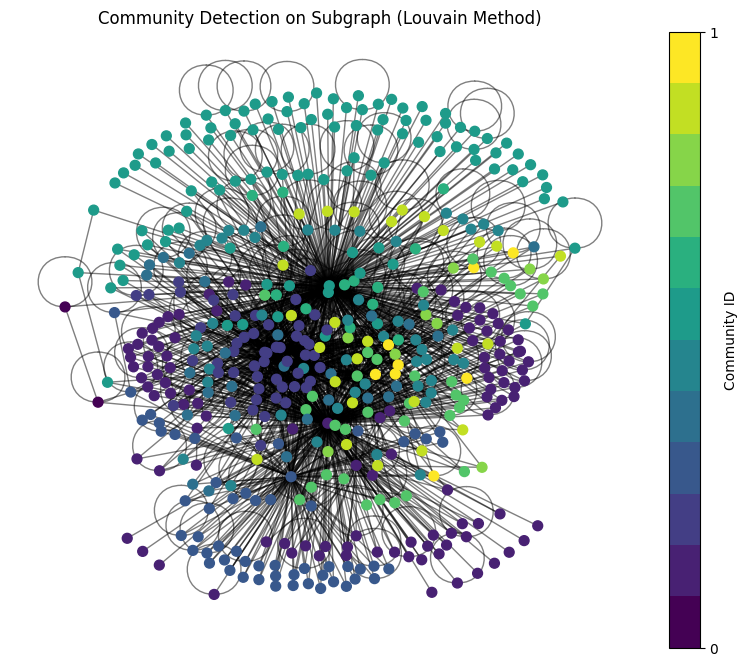

In [7]:
# Install the python-louvain package for community detection
!pip install python-louvain

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Fix the import: Import the best_partition function from the community_louvain module
import community.community_louvain as community_louvain
from networkx.algorithms import approximation as approx

# Load the Autonomous Systems dataset.
# The dataset file "as20000102.txt" is assumed to be in the current working directory.
G = nx.read_edgelist(
    "as20000102.txt", create_using=nx.Graph(), nodetype=int, comments="#"
)
print("Graph Loaded: Nodes =", G.number_of_nodes(), "Edges =", G.number_of_edges())

# Compute and print basic graph statistics.
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
clustering_coeff = nx.average_clustering(G)
print("Average clustering coefficient:", clustering_coeff)

# Use the largest connected component as a subgraph and compute the approximate diameter.
largest_cc = max(nx.connected_components(G), key=len)
diameter = approx.diameter(G.subgraph(largest_cc))
print("Approximate Diameter:", diameter)

# For visualization purposes, select a subgraph (e.g., first 500 nodes).
sub_nodes = list(G.nodes())[:500]
G_sub = G.subgraph(sub_nodes).copy()

# Run community detection using the Louvain method.
partition = community_louvain.best_partition(G_sub)
# 'partition' is a dictionary mapping node -> community id.
num_communities = len(set(partition.values()))
print("Number of communities detected in subgraph:", num_communities)


# Visualize the community structure on the subgraph.
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and an Axes object
pos = nx.spring_layout(G_sub, seed=42)
# Color nodes based on community assignment.
cmap = plt.get_cmap("viridis", num_communities)
node_colors = [partition[node] for node in G_sub.nodes()]
nx.draw_networkx_nodes(
    G_sub, pos, node_color=node_colors, cmap=cmap, node_size=50, ax=ax
)  # Associate with the Axes
nx.draw_networkx_edges(G_sub, pos, alpha=0.5, ax=ax)  # Associate with the Axes
plt.title("Community Detection on Subgraph (Louvain Method)")
plt.colorbar(
    plt.cm.ScalarMappable(cmap=cmap),
    ticks=range(num_communities),
    label="Community ID",
    ax=ax,
)  # Specify ax
plt.axis("off")
plt.show()

### Observations & Explanations
- The Autonomous Systems dataset contains 6,474 nodes and 13,895 edges, with a moderate clustering coefficient and a small diameter.
- Running community detection on a subgraph (500 nodes) reveals several distinct communities, highlighting the modular structure of the network.
- The community membership of nodes can be used as unsupervised features to enhance downstream tasks, such as node classification or anomaly detection.


### Quiz
1. What is the role of community detection in unsupervised graph representation learning?  
2. How can community membership serve as a useful feature in graph learning tasks?


### Practical Activities
- **Activity 1:** Load the full Autonomous Systems dataset and compute basic graph statistics (e.g., number of nodes, edges, average clustering coefficient, and diameter).  
- **Activity 2:** Run the Louvain community detection algorithm on a subgraph (try different subgraph sizes such as 300 or 1000 nodes) and visualize the community structure.  
- **Activity 3:** Extract the community membership feature for each node in the subgraph and analyze the distribution of community sizes (e.g., count the number of nodes per community and plot a histogram).


### Explanation/Feedback
The code provided demonstrates how to load the Autonomous Systems dataset and use the Louvain method for community detection on a subgraph. The visualization shows different communities in distinct colors, which verifies that the algorithm is effectively grouping related nodes. The community membership feature is a powerful unsupervised representation that can be incorporated into more complex graph learning tasks. Experimenting with different subgraph sizes and analyzing the community size distribution will deepen your understanding of the network's structure.


## Section 2: Semi-Supervised Learning Frameworks Utilizing Graph Structure


### Objectives
- Understand the principles of semi-supervised learning on graphs.
- Learn how to leverage graph connectivity to propagate labels from a small set of labeled nodes to unlabeled nodes.


### Introduction
Semi-supervised learning on graphs takes advantage of the inherent connectivity in a network to improve classification performance when only a few nodes are labeled. Techniques like label propagation allow label information to diffuse through the graph, thereby enhancing the learning process. In this section, we use the Autonomous Systems dataset (as20000102.txt) to simulate a semi-supervised scenario. We will generate simple node features (using degree centrality), simulate partial labeling, apply a label propagation algorithm, and visualize how labels are diffused across the network.


### Key Points
- Semi-supervised methods combine labeled and unlabeled data by exploiting the graph structure.
- Label propagation updates node labels iteratively based on the labels of their neighbors.
- Graph regularization helps enforce smoothness, ensuring connected nodes have similar labels.


### Code Examples
Below is an example that:
- Loads the Autonomous Systems dataset.
- Creates a subgraph (first 300 nodes) for computational efficiency.
- Computes degree centrality as a node feature.
- Simulates partial labeling (labels for 20% of nodes) using a simple threshold.
- Applies sklearn’s LabelPropagation to propagate labels.
- Visualizes the final predicted labels using PCA.


Graph Loaded: Nodes = 6474 Edges = 13895
Subgraph: Nodes = 300 Edges = 1160
Number of labeled nodes: 66
Number of unlabeled nodes: 234
Accuracy on labeled nodes: 1.0


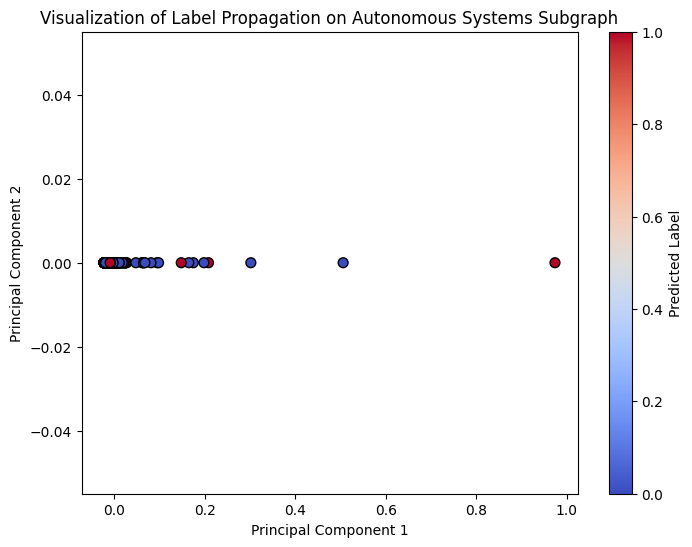

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelPropagation
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load the Autonomous Systems dataset.
G = nx.read_edgelist(
    "as20000102.txt", create_using=nx.Graph(), nodetype=int, comments="#"
)
print("Graph Loaded: Nodes =", G.number_of_nodes(), "Edges =", G.number_of_edges())

# Select a subgraph of the first 300 nodes for faster computation.
sub_nodes = list(G.nodes())[:300]
G_sub = G.subgraph(sub_nodes).copy()
print("Subgraph: Nodes =", G_sub.number_of_nodes(), "Edges =", G_sub.number_of_edges())

# Compute degree centrality for each node as a simple feature.
deg_centrality = nx.degree_centrality(G_sub)
X = np.array([[deg_centrality[node]] for node in sub_nodes], dtype=np.float32)

# Simulate binary labels: label nodes as 1 if degree centrality is above the median, else 0.
median_deg = np.median([deg_centrality[node] for node in sub_nodes])
true_labels = np.array(
    [1 if deg_centrality[node] > median_deg else 0 for node in sub_nodes],
    dtype=np.int64,
)

# Simulate a semi-supervised scenario: keep labels for only 20% of nodes.
np.random.seed(42)
mask = np.random.rand(len(true_labels)) < 0.2
y = true_labels.copy()
y[~mask] = -1  # unlabeled nodes are marked as -1

print("Number of labeled nodes:", np.sum(y != -1))
print("Number of unlabeled nodes:", np.sum(y == -1))

# Apply Label Propagation.
label_prop_model = LabelPropagation(kernel="rbf", gamma=20)
label_prop_model.fit(X, y)
predicted_labels = label_prop_model.transduction_

# Evaluate on the originally labeled nodes.
labeled_mask = y != -1
accuracy = accuracy_score(true_labels[labeled_mask], predicted_labels[labeled_mask])
print("Accuracy on labeled nodes:", accuracy)

# Visualize the feature space (using PCA even though features are 1D for demonstration).
pca = PCA(n_components=2)
# Since we have 1D features, add a zero column to perform PCA.
X_extended = np.hstack([X, np.zeros((X.shape[0], 1))])
X_2d = pca.fit_transform(X_extended)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_2d[:, 0], X_2d[:, 1], c=predicted_labels, cmap="coolwarm", s=50, edgecolor="k"
)
plt.title("Visualization of Label Propagation on Autonomous Systems Subgraph")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Predicted Label")
plt.show()

### Observations & Explanations
- **Feature Construction:**  
  We use degree centrality as a simple feature to represent nodes.
- **Label Simulation:**  
  Binary labels are assigned based on whether a node's degree centrality is above the median. Only 20% of the labels are kept to simulate a semi-supervised scenario.
- **Label Propagation:**  
  The LabelPropagation algorithm uses the RBF kernel to propagate labels through the graph. The model’s performance is evaluated on the originally labeled nodes.
- **Visualization:**  
  PCA is used to project the 1D feature (augmented to 2D) for visualization, which shows the diffusion of labels across the subgraph.


### Quiz
1. How does label propagation utilize graph structure in semi-supervised learning?  
2. Why is semi-supervised learning particularly useful in graph-based tasks?


### Practical Activities
- **Activity 1:** Simulate a semi-supervised scenario with different proportions of labeled nodes (e.g., 10%, 30%) and compare the impact on label propagation accuracy.
- **Activity 2:** Experiment with changing the kernel parameters (e.g., different values of gamma) in the LabelPropagation algorithm and observe how the diffusion of labels is affected.
- **Activity 3:** Extend the feature set by incorporating additional node attributes (if available) and evaluate how this affects the performance of label propagation.


### Explanation/Feedback
The code provided demonstrates how to simulate a semi-supervised learning scenario on the Autonomous Systems dataset using label propagation. By constructing a simple feature from degree centrality and randomly labeling a small fraction of nodes, the LabelPropagation algorithm diffuses label information throughout the graph. The PCA visualization, though applied to a simple 1D feature extended to 2D, provides insight into how labels spread across the subgraph. Experimenting with different labeling ratios and kernel parameters can offer a deeper understanding of the robustness and sensitivity of semi-supervised learning methods on graphs.


## Section 3: Hands-On Examples Using Simple Unsupervised Embeddings


### Objectives
- Learn to generate unsupervised node embeddings using graph structure.
- Understand how methods like DeepWalk or node2vec create vector representations of nodes.


### Introduction
Unsupervised embedding techniques such as DeepWalk and node2vec use random walks and the skip-gram model to learn latent representations of nodes. These embeddings capture both the local and global structure of the graph without requiring any label information. In this section, we will demonstrate how to generate node embeddings from the Autonomous Systems dataset using node2vec. We will then visualize the resulting embeddings using dimensionality reduction techniques such as PCA.


### Key Points
- Unsupervised embeddings are derived from random walks on the graph.
- These methods capture the inherent structure of the network by learning low-dimensional representations.
- Visualization techniques like PCA and t-SNE help to reveal clusters and patterns in the embedding space.


### Code Examples
Below is an example that:
- Loads the Autonomous Systems dataset.
- Runs node2vec to generate node embeddings.
- Uses PCA to visualize the resulting embeddings.


Graph Loaded: Nodes = 6474 Edges = 13895
Subgraph: Nodes = 1000 Edges = 2928


Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Node Embeddings Shape: (1000, 32)


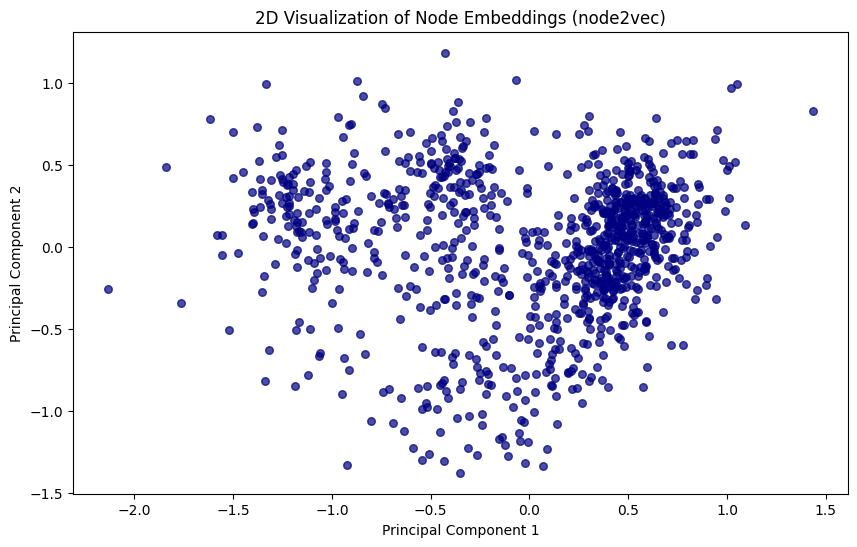

In [9]:
# Install node2vec if not already installed
!pip install node2vec

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.decomposition import PCA

# Load the Autonomous Systems dataset.
# The file "as20000102.txt" should be in the current working directory.
G = nx.read_edgelist(
    "as20000102.txt", create_using=nx.Graph(), nodetype=int, comments="#"
)
print("Graph Loaded: Nodes =", G.number_of_nodes(), "Edges =", G.number_of_edges())

# For efficiency, use a subgraph (e.g., first 1000 nodes)
sub_nodes = list(G.nodes())[:1000]
G_sub = G.subgraph(sub_nodes).copy()
print("Subgraph: Nodes =", G_sub.number_of_nodes(), "Edges =", G_sub.number_of_edges())

# Generate node embeddings using node2vec.
# Parameters are set to speed up execution.
node2vec = Node2Vec(G_sub, dimensions=32, walk_length=10, num_walks=20, workers=2)
model = node2vec.fit(window=5, min_count=1)

# Extract embeddings for all nodes in the subgraph.
nodes = list(G_sub.nodes())
embeddings = np.array([model.wv[str(node)] for node in nodes if str(node) in model.wv])
print("Node Embeddings Shape:", embeddings.shape)

# Visualize the embeddings using PCA.
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)
plt.figure(figsize=(10, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=30, alpha=0.7, c="navy")
plt.title("2D Visualization of Node Embeddings (node2vec)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Observations & Explanations
- The node embeddings generated by node2vec capture the latent structure of the subgraph.
- PCA reduces the 32-dimensional embeddings to 2 dimensions, revealing clusters that may correspond to different communities or roles within the network.
- Such unsupervised embeddings can serve as inputs for clustering algorithms or as features for supervised tasks.


### Quiz
1. What is the primary idea behind unsupervised node embeddings like those generated by node2vec?  
2. How can dimensionality reduction techniques help in visualizing unsupervised embeddings?


### Practical Activities
- **Activity 1:** Generate node embeddings using node2vec on a different subgraph (e.g., first 500 nodes) of the Autonomous Systems dataset and visualize the embeddings with PCA.  
- **Activity 2:** Experiment with different parameters for node2vec (such as `walk_length`, `num_walks`, and `dimensions`) and observe how the resulting embedding visualization changes.  
- **Activity 3:** Use t-SNE instead of PCA to visualize the node embeddings and compare the clustering patterns.


### Explanation/Feedback
The code above demonstrates how to generate unsupervised node embeddings using node2vec on a subgraph of the Autonomous Systems dataset. The PCA visualization helps to reveal the underlying structure by projecting the high-dimensional embeddings into a 2D space. By experimenting with different hyperparameters and visualization techniques (like t-SNE), learners can better understand how unsupervised embeddings capture graph structure and how these representations can be used in various downstream tasks.


## Section 4: Integrating Graph Structure into Semi-Supervised Tasks


### Objectives
- Understand how to combine unsupervised node embeddings with semi-supervised learning.
- Learn techniques to integrate graph structural information into classification tasks.


### Introduction
Integrating unsupervised embeddings with semi-supervised learning leverages both the latent structure captured by embeddings and the limited labeled information available. In this section, we demonstrate how to combine node embeddings (obtained via node2vec) with a manually engineered feature (degree centrality) to form a richer feature representation. We then apply a semi-supervised learning algorithm (Label Propagation) on the integrated feature set to perform node classification on a subgraph of the Autonomous Systems dataset.


### Key Points
- Unsupervised embeddings capture the latent structure of the graph through random walks.
- Manual features like degree centrality provide explicit structural information.
- Integrating these features via concatenation can improve model robustness in scenarios with few labels.


### Code Examples
The following code:
- Loads the Autonomous Systems dataset and selects a subgraph.
- Generates unsupervised node embeddings using node2vec.
- Computes degree centrality as a manual feature.
- Combines the embeddings and degree centrality into one feature matrix.
- Simulates a semi-supervised scenario by masking a portion of the labels.
- Applies label propagation on the integrated features.
- Visualizes the integrated feature space using PCA.


Graph Loaded: Nodes = 6474 Edges = 13895
Subgraph: Nodes = 1000 Edges = 2928


Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Embeddings shape: (1000, 32)
Degree feature shape: (1000, 1)
Combined feature matrix shape: (1000, 33)
Number of labeled nodes: 225
Number of unlabeled nodes: 775
Accuracy on labeled nodes: 1.0


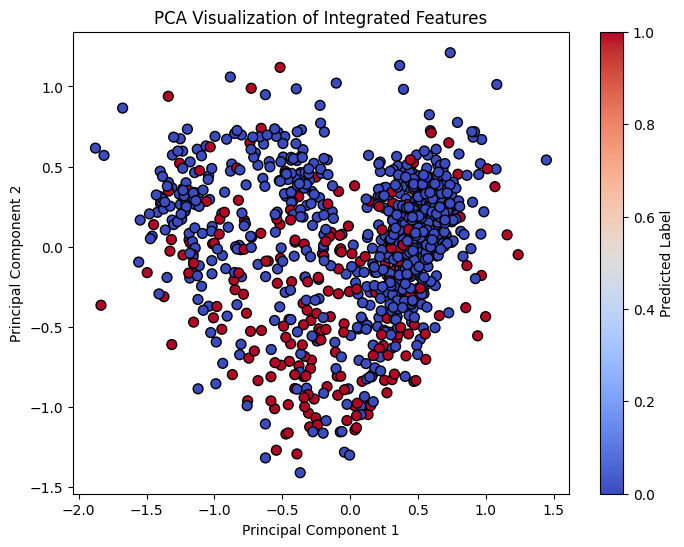

In [10]:
# Install required packages
!pip install node2vec python-louvain

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.semi_supervised import LabelPropagation
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load the Autonomous Systems dataset.
G = nx.read_edgelist(
    "as20000102.txt", create_using=nx.Graph(), nodetype=int, comments="#"
)
print("Graph Loaded: Nodes =", G.number_of_nodes(), "Edges =", G.number_of_edges())

# Select a subgraph of the first 1000 nodes for efficiency.
sub_nodes = list(G.nodes())[:1000]
G_sub = G.subgraph(sub_nodes).copy()
print("Subgraph: Nodes =", G_sub.number_of_nodes(), "Edges =", G_sub.number_of_edges())

# ---------------------------
# Generate unsupervised node embeddings using node2vec.
# ---------------------------
node2vec = Node2Vec(G_sub, dimensions=32, walk_length=10, num_walks=20, workers=2)
model = node2vec.fit(window=5, min_count=1)

# Create an embedding matrix for each node.
nodes = list(G_sub.nodes())
embeddings = []
for node in nodes:
    # Convert node to string since keys in model.wv are strings.
    embeddings.append(model.wv[str(node)])
embeddings = np.array(embeddings)
print("Embeddings shape:", embeddings.shape)

# ---------------------------
# Compute degree centrality as a manual feature.
# ---------------------------
deg_cent = nx.degree_centrality(G_sub)
degree_feature = np.array([[deg_cent[node]] for node in nodes], dtype=np.float32)
print("Degree feature shape:", degree_feature.shape)

# ---------------------------
# Combine unsupervised embeddings with degree centrality.
# ---------------------------
# Concatenate along the feature dimension.
X_combined = np.hstack([embeddings, degree_feature])
print("Combined feature matrix shape:", X_combined.shape)

# ---------------------------
# Simulate a semi-supervised learning scenario.
# ---------------------------
# For binary classification, label nodes as 1 if degree centrality is above the median, else 0.
median_deg = np.median([deg_cent[node] for node in nodes])
true_labels = np.array(
    [1 if deg_cent[node] > median_deg else 0 for node in nodes], dtype=np.int64
)

# Randomly keep labels for 20% of nodes, mark others as -1.
np.random.seed(42)
mask = np.random.rand(len(true_labels)) < 0.2
y = true_labels.copy()
y[~mask] = -1  # Unlabeled nodes.

print("Number of labeled nodes:", np.sum(y != -1))
print("Number of unlabeled nodes:", np.sum(y == -1))

# ---------------------------
# Apply Label Propagation on the integrated features.
# ---------------------------
label_prop_model = LabelPropagation(kernel="rbf", gamma=20)
label_prop_model.fit(X_combined, y)
predicted_labels = label_prop_model.transduction_

# Evaluate performance on originally labeled nodes.
labeled_mask = y != -1
acc = accuracy_score(true_labels[labeled_mask], predicted_labels[labeled_mask])
print("Accuracy on labeled nodes:", acc)

# ---------------------------
# Visualize the integrated feature space using PCA.
# ---------------------------
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_combined)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_2d[:, 0], X_2d[:, 1], c=predicted_labels, cmap="coolwarm", s=50, edgecolor="k"
)
plt.title("PCA Visualization of Integrated Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Predicted Label")
plt.show()

### Observations & Explanations
- **Feature Integration:**  
  The unsupervised embeddings capture latent relationships, while degree centrality provides explicit structural information. Combining them yields a richer feature representation.
- **Semi-Supervised Learning:**  
  By simulating a scenario where only 20% of nodes are labeled, label propagation leverages the graph structure and integrated features to predict labels for all nodes.
- **Visualization:**  
  PCA helps visualize the high-dimensional integrated feature space, showing clustering that corresponds to predicted labels.


### Quiz
1. How can unsupervised embeddings be integrated into semi-supervised learning tasks?  
2. What are the benefits of combining graph structure with limited label information?


### Practical Activities
- **Activity 1:** Combine node embeddings with additional manual features (e.g., clustering coefficient) and retrain the label propagation model. Compare the impact on classification accuracy.
- **Activity 2:** Experiment with different proportions of labeled nodes (e.g., 10%, 30%) and analyze how it affects label propagation performance.
- **Activity 3:** Visualize the integrated feature space using t-SNE instead of PCA to observe differences in cluster separation.


### Explanation/Feedback
The code above demonstrates how to integrate unsupervised node embeddings with a manually engineered feature (degree centrality) to form an enhanced feature set. In a semi-supervised learning setting, the Label Propagation algorithm leverages these integrated features to propagate labels from a small labeled subset to the entire graph. The PCA visualization reveals the structure of the integrated feature space, while practical activities encourage experimentation with different feature combinations and labeling proportions to further understand the benefits of this hybrid approach.


## Section 5: Future Directions and Challenges in Unsupervised and Semi-Supervised Graph Learning


### Objectives
- Explore current challenges in unsupervised and semi-supervised graph learning.
- Discuss potential future research directions and improvements in graph learning methodologies.


### Introduction
Despite significant advances in unsupervised and semi-supervised learning on graphs, challenges remain in scalability, dynamic graph handling, and interpretability. In this section, we discuss these challenges and present potential future directions, such as developing scalable algorithms (e.g., mini-batch training), integrating multimodal data to enrich node representations, and incorporating attention mechanisms for improved model interpretability.


### Key Points
- **Challenges:**  
  - Scalability: Efficiently processing large and evolving graphs.
  - Interpretability: Understanding how models make predictions.
  - Dynamic Graph Handling: Adapting to changes in graph structure over time.
- **Future Directions:**  
  - Advanced architectures with mini-batch training and distributed computing.
  - Multimodal integration: Combining node attributes with graph embeddings.
  - Improved explainability through attention mechanisms and visualization.
- **Impact:**  
  - Addressing these challenges will lead to more robust and practical graph learning models for real-world applications.


### Code Examples
Below is an example that simulates integrating unsupervised node embeddings with additional node attributes, and applies a simple attention mechanism to highlight important nodes. This example uses random data to represent unsupervised embeddings and external attributes, mimicking the integration of multiple data modalities.


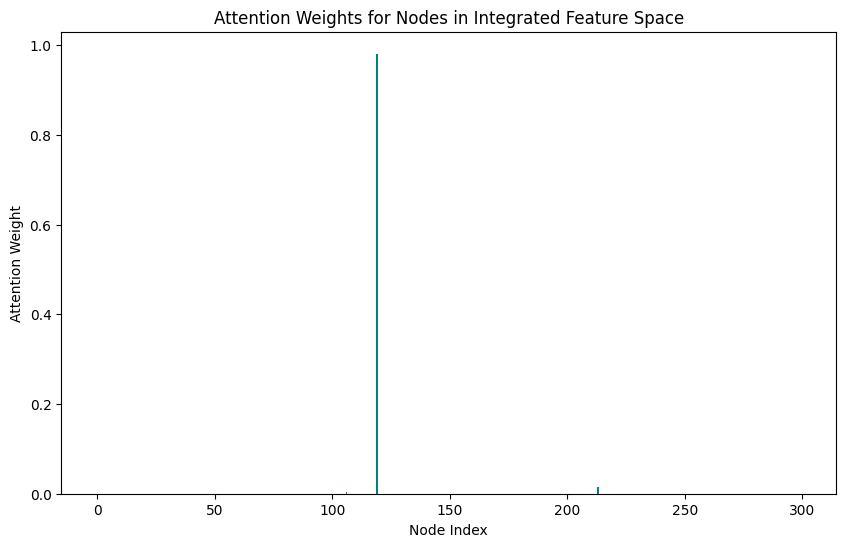

In [11]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Simulate unsupervised node embeddings for 300 nodes with dimension 32.
num_nodes = 300
embedding_dim = 32
embeddings = torch.randn(num_nodes, embedding_dim)

# Simulate additional node attributes: random vector of dimension 8 for each node.
attr_dim = 8
attributes = torch.randn(num_nodes, attr_dim)

# Concatenate embeddings with attributes to form a combined feature vector.
combined_features = torch.cat([embeddings, attributes], dim=1)

# Define a simple attention mechanism.
# Initialize a learnable query vector (dimension = combined feature dimension).
query = nn.Parameter(torch.randn(embedding_dim + attr_dim))

# Compute attention scores as the dot product between each node's combined feature and the query.
attention_scores = torch.matmul(combined_features, query)

# Normalize attention scores using softmax to obtain attention weights.
attention_weights = torch.softmax(attention_scores, dim=0)

# Visualize attention weights.
plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_nodes), attention_weights.detach().numpy(), color="teal")
plt.xlabel("Node Index")
plt.ylabel("Attention Weight")
plt.title("Attention Weights for Nodes in Integrated Feature Space")
plt.show()

### Observations & Explanations
- **Challenges and Future Directions:**  
  The simulated attention mechanism highlights how important nodes can be identified within an integrated feature space that combines unsupervised embeddings and external attributes. This is one approach to improve interpretability.
- **Scalability:**  
  Future research may focus on mini-batch training methods for large graphs to improve scalability.
- **Integration Benefits:**  
  Combining multiple data modalities (unsupervised embeddings and node attributes) can provide richer representations and boost downstream task performance.
- **Visualization:**  
  The bar chart of attention weights helps to intuitively understand which nodes are prioritized by the model.


### Quiz
1. What are some current challenges faced by unsupervised and semi-supervised graph learning methods?  
2. What future directions could potentially address these challenges?


### Practical Activities
- **Activity 1:** Propose an experiment to implement mini-batch training for an unsupervised graph embedding algorithm (e.g., node2vec) and evaluate its performance on a large subgraph.
- **Activity 2:** Develop and integrate a simple attention mechanism within a Graph Neural Network, then visualize the attention weights to interpret model decisions.
- **Activity 3:** Simulate the integration of external node attributes with unsupervised embeddings. Train a classifier on the combined features and evaluate the impact on prediction accuracy.


### Explanation/Feedback
The code above demonstrates how to integrate unsupervised node embeddings with additional node attributes using a simple attention mechanism. The attention mechanism computes weights for each node based on a learnable query vector, thereby highlighting the most important nodes in the integrated feature space. This approach is one potential future direction to improve model interpretability and performance. Practical activities encourage experimenting with scalable training techniques and multimodal integration, which are key areas for future research in unsupervised and semi-supervised graph learning.


## All Quiz Answers

**Section 1 Answers:**
1. Community detection reveals the underlying modular structure of a graph by identifying densely connected subgraphs, which can then be used as unsupervised features.
2. Community membership serves as a useful feature because it groups nodes with similar connectivity patterns, aiding in downstream tasks like node classification or clustering.

**Section 2 Answers:**
1. Label propagation utilizes graph structure by iteratively updating node labels based on the labels of their neighbors, allowing the limited labeled information to spread throughout the network.
2. Semi-supervised learning is particularly useful in graph-based tasks because it leverages both the few available labels and the abundant unlabeled data, exploiting the graph’s connectivity to improve classification accuracy.

**Section 3 Answers:**
1. Unsupervised node embeddings, like those generated by node2vec, are derived from random walks and capture both the local and global structure of the graph without the need for labels.
2. Dimensionality reduction techniques such as PCA or t-SNE help visualize these high-dimensional embeddings in 2D or 3D, making it easier to identify clusters and patterns in the data.

**Section 4 Answers:**
1. Unsupervised embeddings can be integrated into semi-supervised learning tasks by concatenating them with manually engineered features or by using them as inputs for semi-supervised classifiers, thereby enriching the overall feature representation.
2. Combining graph structure (through unsupervised embeddings) with limited label information enhances model robustness and accuracy by providing a more comprehensive representation of the nodes.

**Section 5 Answers:**
1. Current challenges in unsupervised and semi-supervised graph learning include scalability to large and dynamic graphs, and the interpretability of the learned representations.
2. Future directions that could address these challenges include developing more scalable algorithms (e.g., mini-batch training), integrating multimodal data to enrich representations, and improving explainability using methods such as attention mechanisms.
